In [ ]:
import numpy as np
import matplotlib.pyplot as plt

---

## 1  固有値・固有ベクトルとは？

| 用語         | 記号                        | 直観的に言うと…                       |
| ---------- | ------------------------- | ------------------------------ |
| **固有値**    | $\lambda$                 | 行列 $A$ がある方向をどれだけ「伸縮」させるかを表す倍率 |
| **固有ベクトル** | $\mathbf v \neq \mathbf0$ | その方向（伸縮前後で向きが変わらないベクトル）        |

行列 $A\in\mathbb R^{n\times n}$ について

$$
A\mathbf v=\lambda\mathbf v
$$

を満たす $(\lambda,\mathbf v)$ の組を **固有対** と呼びます。
この式は「線形変換 $A$ を掛けたあとでも，$\mathbf v$ は同一直線上にあり，長さだけが $\lambda$ 倍になる」ことを意味します。

---

## 2  求め方 － 手計算から数値計算法まで

### 2.1  小規模行列（解析的手法）

1. **特性方程式を立てる**

   $$
   \det(A-\lambda I)=0
   $$
2. **固有値 $\lambda$ を解く**

   * 2 × 2：二次方程式
   * 3 × 3：三次方程式（カルダノ公式）
   * それ以上：解析解は一般に困難
3. **固有ベクトルを解く**
   固有値が求まったら

   $$
   (A-\lambda I)\mathbf v=\mathbf0
   $$

   の一次連立方程式を解いて $\mathbf v$ を得る。

> **Python 例（2 × 2）：**
>
> ```python
> import sympy as sp
> A = sp.Matrix([[2, 5],
>                [3, -1]])
> lambdas = A.eigenvals()          # 固有値
> vectors = A.eigenvects()         # 固有ベクトル
> ```

---

### 2.2  中～大規模行列（数値的手法）

| 手法                              | 収束対象     | 特徴 / 用途                   |
| ------------------------------- | -------- | ------------------------- |
| **べき乗法 (Power Method)**         | 最大絶対値固有値 | 実装容易・疎行列可。PageRank など     |
| **逆反復 (Inverse Iteration)**     | 任意の固有値近傍 | シフト付きで高速収束                |
| **Rayleigh–Quotient Iteration** | 任意       | 立方収束（速い）が逆行列計算を毎回要求       |
| **QR アルゴリズム**                   | 全固有値     | 標準的。Hessenberg→QR 分解を逐次実施 |
| **Jacobi 法**                    | 対称行列     | 高精度・並列化しやすい               |
| **Lanczos / Arnoldi**           | 極端固有値    | 大規模疎行列・科学技術計算             |

> **べき乗法の最小実装（NumPy 使用）：**
>
> ```python
> import numpy as np
> def power_method(A, num_iter=1000, tol=1e-9):
>     n  = A.shape[0]
>     v  = np.random.rand(n)
>     v /= np.linalg.norm(v)
>     lam_old = 0.0
>     for _ in range(num_iter):
>         w   = A @ v
>         lam = np.linalg.norm(w, ord=np.inf) * np.sign(w[np.argmax(np.abs(w))])
>         v   = w / np.linalg.norm(w)
>         if abs(lam - lam_old) < tol:
>             break
>         lam_old = lam
>     return lam, v
> ```
>
> ※「最大固有値 ≒ PageRank スコア」というイメージで学習すると理解が早まります。

---

## 3  固有値・固有ベクトルの“読み取り方”

1. **安定・発散の判定**
   連立一次微分方程式 $\dot{\mathbf x}=A\mathbf x$ では

   * $\text{Re}(\lambda)<0$: 原点に収束
   * $\text{Re}(\lambda)>0$: 発散
   * $\text{Re}(\lambda)=0$: 周期軌道や中心
2. **対角化の可否**

   * 幾何重複度 = 代数重複度 ⇒ 対角化可能
   * できれば $\;A=PDP^{-1}$ で冪 $A^k=PD^kP^{-1}$ を一瞬で計算
3. **固有空間**
   同じ固有値を共有する全ベクトルの集合。線形独立な固有ベクトルで基底を張る。

---

## 4  代表的な活用シーン（実務・研究・競技プログラミング）

| 分野              | どう使う？                                                        | ポイント                          |
| --------------- | ------------------------------------------------------------ | ----------------------------- |
| **線形微分方程式**     | 解の一般形を $e^{\lambda t}\mathbf v$ で構築                          | 力学系・制御理論                      |
| **マルコフ連鎖**      | 定常分布は固有値 1 の固有ベクトル                                           | Web ランキング・確率過程                |
| **主成分分析 (PCA)** | 共分散行列の固有分解で最大分散方向を算出                                         | 次元削減・データ可視化                   |
| **振動解析**        | 剛性行列 $K$ と質量行列 $M$ の一般化固有値問題 $K\mathbf v=\lambda M\mathbf v$ | 橋梁・建築設計                       |
| **量子力学**        | ハミルトニアンの固有値＝エネルギー準位                                          | スペクトル理論                       |
| **画像処理 (SVD)**  | $A=U\Sigma V^\top$ の $\Sigma^2$ が固有値                         | 低ランク近似・圧縮                     |
| **グラフ理論**       | ラプラシアンの固有値 → 連結性・クラスタ数                                       | スペクトラルクラスタリング                 |
| **競技プログラミング**   | 行列べき乗 DP, Fibonacci 高速計算                                     | $\mathcal O(\log n)$ で指数的増加処理 |

---

## 5  数値計算で気を付けたいポイント

1. **スケーリング** 行列要素のオーダー差が大きいと丸め誤差が拡大。
2. **複素固有値** 実行列でも複素共役対が現れる。実数部・虚数部で意味を解釈。
3. **多重固有値** 固有ベクトルが一意でない → 基底が不安定。正規モードを直交化するか、SVD に切り替える。
4. **疎行列専用ライブラリ** SciPy `sparse.linalg.eigs / eigsh` を活用。

---

## 6  学習を深めるためのおすすめステップ

1. **2 × 2・3 × 3 を手で計算** 特性方程式から固有ベクトルまで書き出す。
2. **Python で数値実験** 上記のべき乗法を実装し、`numpy.linalg.eig` と比較。
3. **アプリケーションに触れる** - PCA を自分のデータで回す

   * 1 次元の ODE 系（例：ロジスティック）を行列化してシミュレーション
4. **QR アルゴリズムの内部を追う** Givens 回転・Householder 反射の役割を理解。
5. **応用プロジェクト** グラフ Laplacian の第 2 固有値（Fiedler 値）でクラスタ数を推定するなど、実課題とリンクさせる。

---

### まとめ

* **固有値は倍率、固有ベクトルは方向** — 行列変換の本質的“骨格”を示す。
* **解析解は小規模限定**、実務では **QR 系** や **べき乗法** が主役。
* 応用は **PCA・Markov 連鎖・機械振動・量子力学** など広範。
* 自作コードで挙動を確かめると理解が一気に定着。



In [ ]:
#71 パワーメソッド２
import numpy as np
import matplotlib.pyplot as plt


def power_method_2d(A, max_iter=500, tol=1e-12):
    """
    2×2 行列 A の最大固有値と固有ベクトルをパワーメソッドで近似し，
    反復ごとのベクトルも記録する。
    """
    v = np.random.rand(2)
    v /= np.linalg.norm(v)
    print('任意の初期ベクトル：',v)
    hist = [v.copy()]

    λ_old = 0.0
    for _ in range(max_iter):
        w = A @ v
        v = w / np.linalg.norm(w)
        hist.append(v.copy())
        λ = v @ (A @ v)         

        if abs(λ - λ_old) < tol * abs(λ):
            break
        λ_old = λ
    print('収束する様子：',*hist)
    return λ, v, hist

A = np.array([[1, 2],
              [3, -1]], dtype=float)

lam, vec, hist = power_method_2d(A)
steps = np.arange(len(hist))
xs = [v[0] for v in hist]
ys = [v[1] for v in hist]

# 1. 成分の収束
plt.figure(figsize=(6, 3))
plt.plot(steps, xs, marker='o', label='v[0]')
plt.plot(steps, ys, marker='s', label='v[1]')
plt.xlabel('iteration')
plt.ylabel('component value')
plt.title('Power-method convergence (components)')
plt.legend()
plt.grid(True)

# 2. 単位円上の軌跡
plt.figure(figsize=(4, 4))
plt.plot(xs, ys, marker='o')
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_patch(circle)
plt.xlabel('x component')
plt.ylabel('y component')
plt.title('Trajectory of v on unit circle')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)

plt.show()

print(f'λ_max ≈ {lam:.10f}')
print('eigenvector ≈', vec)
print('iterations  =', len(hist) - 1)



### レイリー商反復（Rayleigh–Quotient Iteration, RQI）とは

> **目的**：正方行列 $A\in\mathbb{R}^{n\times n}$ の
> 単一の固有値・固有ベクトル対 $(\lambda,\mathbf v)$ を高速に高精度で求める。
> **原理**：
>
> 1. 逆反復 *$ (A-\sigma I)^{-1}\mathbf x$* の「シフト」$\sigma$ を
>    毎ステップ **レイリー商**
>
>    $$
>      \rho(\mathbf x)=
>        \frac{\mathbf x^{\!\top} A\mathbf x}{\mathbf x^{\!\top}\mathbf x}
>    $$
>
>    に自動更新する。
> 2. これが **ニュートン法**で「レイリー商方程式」
>    $f(\mathbf x)=A\mathbf x-\rho(\mathbf x)\mathbf x=\mathbf0$
>    を解くことに一致 → 対称行列なら **立方（3次）収束**。

---

## 1  アルゴリズムのステップ

| $k$ 番目の反復    | 処理                                                                                                               | 説明                                                      |
| ------------ | ---------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------- |
| **1. 正規化**   | $\displaystyle \mathbf x_k\leftarrow \frac{\mathbf x_k}{\lVert\mathbf x_k\rVert}$                                | 数値安定化                                                   |
| **2. シフト決定** | $\displaystyle \mu_k=\rho(\mathbf x_k)=\frac{\mathbf x_k^{\!\top}A\mathbf x_k}{\mathbf x_k^{\!\top}\mathbf x_k}$ | 現在の固有値近似                                                |
| **3. 逆反復**   | 解く：$(A-\mu_k I)\mathbf y_{k+1}=\mathbf x_k$                                                                      | $A-\mu_k I$ は *ほぼ特異* ⇒ $\mathbf y_{k+1}$ が急激に正しい固有方向へ伸長 |
| **4. 更新**    | $\mathbf x_{k+1}\leftarrow\mathbf y_{k+1}$                                                                       | 次の試行ベクトル                                                |
| **5. 収束判定**  | 例：$\lVert A\mathbf x_{k+1}-\mu_{k+1}\mathbf x_{k+1}\rVert\le \text{tol}$                                         | 固有対条件                                                   |

> **初期化**：適当な非ゼロベクトル $\mathbf x_0$。
> **停止**：通常 10 〜 20 回で倍精度限界に達する。

---

## 2  収束性の特徴

| 行列の性質          | 収束次数                                               | 条件                         |
| -------------- | -------------------------------------------------- | -------------------------- |
| **対称（実エルミート）** | 立方：$\lvert\theta_{k+1}\rvert\approx C\theta_k^{3}$ | $\mathbf x_0$ が目的固有空間に十分近い |
| **一般実行列**      | 準二次                                                | 途中で複素シフトに入る場合あり            |
| **重固有値**       | 可変：固有空間へ射影                                         | 幾何重複度>1 では主方向を 1 本だけ抽出     |

> 収束半径（許容初期誤差）は逆反復より狭いが、
> *入ると一気に* 精度が上がるのが RQI の強み。

---

## 3  数値実装の注意点

1. **線形系 $(A-\mu_k I)\mathbf y=\mathbf x_k$ の解き方**

   * 小規模 ⇒ LU 分解を毎回やり直し（コスト $O(n^3)$／step）
   * 対称 ⇒ LDLᵀ や Cholesky（ピボット付き）
   * 大規模疎 ⇒ ILU + 反復解法（GMRES など）で *inexact RQI*
2. **$\mu_k$ が固有値に接近すると行列が極端に悪条件**

   * *解法の残差許容誤差* を階層的に絞る（粗→細）と安定
3. **複素シフト**
   一般実行列では途中で複素 $\mu_k$ が現れる。
   実数演算で済ませたい場合は複素対を 2 × 2 ブロックにまとめる *double-shift RQI* を使用。
4. **正規化**
   $\mathbf x_k$ に *符号（位相）を揃える* と連続したベクトル列が得られ、差分で 2 次残差を測りやすい。

---

## 4  疑似コード

```text
INPUT : A ∈ ℝ^{n×n}, x ← random ≠ 0
while not converged do
    x ← x / ‖x‖               # normalize
    μ ← (xᵀ A x) / (xᵀ x)      # Rayleigh quotient
    Solve (A − μ I) y = x      # linear solve
    x ← y                      # update iterate
end while
RETURN μ, x / ‖x‖
```

---

## 5  Python 最小実装（対称行列想定）

```python
import numpy as np
from numpy.linalg import solve, norm

def rqi(A, x0, tol=1e-12, max_iter=30):
    x = x0.astype(float)
    for _ in range(max_iter):
        x /= norm(x)                         # 1. normalize
        mu = x @ A @ x                       # 2. Rayleigh quotient
        try:
            y  = solve(A - mu*np.eye(len(A)), x)  # 3. shifted solve
        except np.linalg.LinAlgError:
            break                            # singular ⇒ 収束したと判断
        if norm(A@y - mu*y) < tol:           # 5. residual check
            return mu, y/norm(y)
        x = y                                # 4. update
    return mu, x/norm(x)
```

> **テスト**
>
> ```python
> A = np.array([[2,5],[5,3]])        # 対称 2×2
> lam, v = rqi(A, np.random.randn(2))
> print(lam)                         # 最大固有値に収束
> print(A@v - lam*v)                 # ほぼ 0
> ```

---

## 6  RQI の発展形と応用

| バリエーション                | ポイント                      | 主な用途              |
| ---------------------- | ------------------------- | ----------------- |
| **複素（複利）シフト RQI**      | 非対称行列で複素固有値を直接収束          | 電力系安定解析           |
| **ハウスホルダー／Givens を併用** | RQI を “内部シフト QR” とみなして実装  | LAPACK `xSTEQR` 等 |
| **Jacobi–Davidson 法**  | RQI をサブスペース拡張で近似 → 大規模疎行列 | 非線形固有値問題          |
| **LOBPCG の初期化**        | べき乗/逆反復で粗近似 → RQI 数回で高精度  | 有限要素振動解析          |

---

## 7  どんなとき RQI を選ぶ？

1. **高精度が欲しい（10⁻¹² 〜 10⁻¹⁴）**
   制御系極配置や構造モード解析で「固有値の微小差」を見たい場合。
2. **行列サイズが中程度（n≲3 000）で密**
   LU を毎回作るコストが許容範囲。
3. **すでに良い初期ベクトルがある**
   べき乗法・Lanczos で粗推定した後に「仕上げ」として使う。

逆に

* **巨大疎行列** で **1 個だけ固有ペア** が要るなら **シフト付き逆反復**（固定シフト, 同じ因子を再利用）の方がコスト効率がよいことが多いです。

---

### まとめ

*Rayleigh–Quotient Iteration* は

* **逆反復＋動的シフト** のシンプルな拡張
* 対称行列で **立方収束** という圧倒的スピード
* シフト行列が毎回変わるため「線形系の解き方」が実装の肝

適切な前処理や初期化と組み合わせれば、
小～中規模固有値問題の“最終仕上げ”として非常に頼りになる手法です。


In [ ]:
#72 レイリー商反復

def rqi(mx,tol=1e-12,max_iter=30):
    x=np.array([1,0])
    for _ in range(max_iter):
        x=x/np.linalg.norm(x)
        mu=x@mx@x
        try:
            y=np.linalg.solve(mx-mu*np.eye(len(mx)),x)
        except np.linalg.LinAlgError:
            break
        if np.linalg.norm(A@y-mu*y)<tol:
            return mu,y/np.linalg.norm(y)
        x=y
    return mu, x/np.linalg.norm(x)

A = np.array([[2,5],[5,3]])        # 対称 2×2
lam, v = rqi(A)
print(lam)                         # 最大固有値に収束
print(A@v - lam*v)                 # ほぼ 0

In [ ]:
#73 固有値分解と行列の冪
A=np.array([
    [1,2],
    [3,1]
])

eigval,eigvec=np.linalg.eig(A)
P=eigvec
D=np.diag(eigval)
Pinv=np.linalg.inv(P)

for _ in range(5):
    A@=A
    D@=D
print(A)
PDPi=P@D@Pinv
print(PDPi)
print((A-PDPi)/max(A[0]+A[1]))

In [ ]:
import scipy

## 1. 行列指数関数 (Matrix Exponential)

### 1.1 定義

**行列指数関数**は、通常の指数関数 $\exp(x)$ を行列に拡張したものです。$n \times n$ 行列 $A$ に対して、次のように定義されます。

$$
\exp(A) \;=\; \sum_{k=0}^{\infty} \frac{A^k}{k!}
$$

ここで、

* $A^0$ は単位行列 $I$（$n \times n$ の単位行列）とする
* $\displaystyle A^k$ は行列 $A$ の $k$ 乗
* $\displaystyle k!$ は通常の階乗

とします。これは要素ごとに定義するのではなく、「行列を掛け合わせる」形でのべき乗と階乗を用いた無限級数で定義されます。

### 1.2 主な性質

1. **指数法則の類似**
   2つの行列 $A, B$ が可換（すなわち $AB = BA$）ならば、スカラーの場合と同様に

   $$
   \exp(A + B) \;=\; \exp(A) \,\exp(B)
   $$

   が成立します。
   ただし、一般には行列は可換ではないので、$\exp(A + B) = \exp(A)\exp(B)$ は成り立たないことが多い点に注意が必要です。

2. **微分方程式との関係**
   線形常微分方程式

   $$
   \frac{d}{dt} X(t) \;=\; A\, X(t),\quad X(0) = X_0
   $$

   の解は

   $$
   X(t) \;=\; \exp(tA)\,X_0
   $$

   で与えられます。よって、行列指数関数は線形系の解を与える重要な道具です。

3. **行列函数の一般論の一例**
   $\exp(A)$ はいわゆる「行列函数（matrix function）」の代表例です。一般に、固有値分解やジョルダン標準形を用いて、より効率的に計算することができます（後述）。

### 1.3 計算方法

1. **級数定義に基づく直接計算**
   $\displaystyle \exp(A) = I + A + \tfrac{1}{2!}A^2 + \tfrac{1}{3!}A^3 + \cdots$ を必要な項まで足し合わせる数値計算。しかし、高次べき乗を逐次計算すると計算量が大きくなるため、大きな行列には向きません。

2. **固有値分解による計算**
   もし $A$ が対角化可能（正則行列 $P$ と対角行列 $D$ を用いて $A = PDP^{-1}$ と書ける）であれば、

   $$
   \exp(A) \;=\; \exp\bigl(PDP^{-1}\bigr) \;=\; P \,\exp(D)\,P^{-1},
   $$

   となります。対角行列 $D$ の指数関数 $\exp(D)$ は対角要素に対応するスカラーの指数関数をとるだけなので計算が容易です。

   * $D = \mathrm{diag}(\lambda_1, \lambda_2, \dots, \lambda_n)$ のとき

     $$
     \exp(D) \;=\; \mathrm{diag}\bigl(e^{\lambda_1}, e^{\lambda_2}, \dots, e^{\lambda_n}\bigr).
     $$

3. **ジョルダン標準形 (Jordan Canonical Form) を用いる方法**
   一般の行列 $A$ が対角化可能でない場合でも、相似変換によってジョルダン標準形に変換できます。例えば

   $$
   A = P \,J\,P^{-1}
   $$

   という形で

   $$
   J = 
   \begin{pmatrix}
     J_{m_1}(\lambda_1) &        & \mathbf{0}\\
                       & \ddots &         \\
     \mathbf{0}        &        & J_{m_k}(\lambda_k)
   \end{pmatrix}
   $$

   とブロック対角化できるので、行列指数関数も

   $$
   \exp(A) = P \,\exp(J)\,P^{-1}
   $$

   と書けます。ジョルダンブロック $J_{m}(\lambda)$ は

   $$
   J_{m}(\lambda) = 
   \begin{pmatrix}
   \lambda & 1       & 0      & \cdots & 0 \\
   0       & \lambda & 1      & \cdots & 0 \\
   \vdots  &         & \ddots & \ddots & \vdots \\
   0       & 0       & \cdots & \lambda & 1 \\
   0       & 0       & \cdots & 0       & \lambda
   \end{pmatrix}
   $$

   の形をしており、その指数関数は定まった公式があります（べき級数でブロック上の構造を考慮して計算される）。

4. **数値線形代数的手法（パド近似など）**
   実際の数値計算では、パド近似やスクエアリング・アンド・スケーリング (Scaling and Squaring) といったアルゴリズムがよく用いられます。これは収束を早めたり、計算の安定性を保ったりする工夫がなされています。

---

## 2. 行列対数関数 (Matrix Logarithm)

### 2.1 定義

**行列対数関数**は、行列指数関数の「逆関数」に相当します。
すなわち、行列 $X$ に対して「$\exp(A) = X$ を満たす行列 $A$ を $\log(X)$ と定義したい」という考え方ですが、以下のような問題が生じます。

* 行列は一般に可換でないので、スカラーの場合のような単純な対数則 $\log(XY) = \log(X) + \log(Y)$ が常に成り立つわけではない
* $\exp(A) = X$ を満たす $A$ は一意ではない可能性がある（複数の解が存在する場合がある）
* $\log(X)$ がそもそも存在しない行列 $X$ もある

こうした点から、行列対数を厳密に定義するには「どの領域の行列について」「どの分枝（branch）の対数を選ぶか」をきちんと決める必要があります。

### 2.2 存在と一意性

#### 2.2.1 正則行列の場合

行列対数が存在するためには、少なくとも行列 $X$ が\*\*正則（可逆）\*\*である必要があります。逆行列を持たない行列に対しては $\exp(A)$ がゼロ行列の固有値を持つことはなく（$\exp(A)$ の固有値は常に $e^\lambda$ で 0 にはならない）、したがって可逆行列でないと対数の対応が取れないと考えられます。

しかし、正則であっても常に対数を持つわけではなく、成分が複素数の場合に一般化し、スペクトル（固有値）が負の実数や 0 によらないように分枝をうまく選ぶなどの考慮が必要になります。

#### 2.2.2 主対数 (Principal Log)

正則行列 $X$ の固有値を負の実数や複素平面上の負の実軸付近に置かないように考慮すると（あるいは正の実軸を切断として考える）、スカラーの複素対数の場合と同様に、「主対数 (Principal Log)」を定義することができます。

* 例えば、全ての固有値が正の実数にある「正定値対称行列 $X$」などの場合、対数は一意に定まり $\log(X)$ も再び対称行列（あるいはエルミート行列）になります。

一方、負の実軸をまたぐような固有値をもつ行列では、どのように複素平面の切断を選んでも多価性が生じ、行列対数も多価になります。

### 2.3 計算方法

行列対数の計算も、**対角化**や **ジョルダン標準形** を用いて行うのが理論的にはわかりやすいです。

1. **対角化可能な場合**
   $X = P\,D\,P^{-1}$ で $D$ が対角行列であり、かつ各固有値 $\lambda_i$ に対してスカラー対数がうまく定義できるならば、

   $$
   \log(X) = P \,\log(D)\,P^{-1},
   $$

   となります。ここで

   $$
   \log(D) \;=\; \mathrm{diag}\bigl(\log(\lambda_1), \log(\lambda_2), \dots, \log(\lambda_n)\bigr)
   $$

   （ただし対数の分枝選択に注意）。

2. **ジョルダン標準形を用いる場合**
   $X = P\,J\,P^{-1}$ と書き、ジョルダンブロックごとに対数を定義することで

   $$
   \log(X) = P\,\log(J)\,P^{-1}
   $$

   と表せます。ジョルダンブロック $J_m(\lambda)$ に対しては、対数のべき級数
   $\log(I+N)$（$N$ は非対角成分を持つ冪零行列）を展開する形で計算できます（あるいは直接公式が存在します）。

3. **数値アルゴリズム**

   * 行列対数を計算する際には、しばしば行列指数関数や平方根計算（$\sqrt{X}$）などを反復的に用いるアルゴリズムが使われます。
   * 代表的なものに **inverse scaling and squaring method** などがあり、$\exp$ の計算で用いられる scaling and squaring 手法と逆の手続きを踏んで対数を計算します。

### 2.4 例：正定値対称行列の場合

実対称行列 $X$ が正定値である場合、全ての固有値が正の実数になります。したがって「主対数」が自然に一意に定義され、しかもその結果として得られる $\log(X)$ も実対称行列となります。

* より具体的に言うと、$X$ を固有値分解 $X = Q\,\Lambda\,Q^T$（$\Lambda$ は正の対角行列、$Q$ は直交行列）によって対角化すると、

  $$
  \log(X) \;=\; Q \,\log(\Lambda)\, Q^T
  $$

  となり、$\log(\Lambda)$ は各固有値の実対数を対角に並べたものです。

---

## 3. 行列指数関数と行列対数関数の応用

1. **線形微分方程式の解法**

   * 行列指数関数 $\exp(A)$ は、常微分方程式 $\dot{X}(t) = A\,X(t)$ の解を明示的に与えます。

2. **行列微分方程式における対数**

   * 積分因子やフローマップを対数で扱うこともあり、$\exp$-$\log$ の対応が重要になります。

3. **制御理論やシステム理論**

   * 離散時間系と連続時間系の対応（サンプリングとホールド）において、離散時間演算子 $X \mapsto AX$ と連続時間の演算子との間を $\exp$ や $\log$ を用いて対応付けることがあります。

4. **幾何学的応用 (Lie 群と Lie 代数)**

   * 一般線形群 $GL(n, \mathbb{R})$ の部分群としての行列群（例：回転群など）には、Lie 代数（行列の空間）から行列指数関数を通じた指数写像が定義され、行列対数はその局所逆写像として非常に重要です。

5. **数値解析・コンピュータグラフィックス分野**

   * リジッド変換（回転 + 並進）などを指数写像で扱う場面や、行列対数によってなめらかに補間を行う応用（ロドリゲスの回転公式・対数マップを使った補間）などが存在します。

---

## 4. まとめ

* **行列指数関数 $\exp(A)$** は

  $$
  \exp(A) = \sum_{k=0}^{\infty} \frac{A^k}{k!}
  $$

  で定義され、線形系の解を与えるなど非常に基本的かつ重要な行列函数の一つです。
  計算には級数定義だけでなく、固有値分解・ジョルダン標準形・数値アルゴリズム（scaling and squaring + パド近似など）がよく用いられます。

* **行列対数関数 $\log(X)$** は $\exp(A) = X$ をみたす $A$ を与える逆函数的役割を果たしますが、スカラー対数の多価性に加え、行列の非可換性やスペクトルの取り扱いによって、定義域や一意性に注意が必要です。
  正定値行列のようにスペクトルが正の実数だけに限られる場合などには、主対数が一意に定義でき、性質が良いです。

行列指数関数と行列対数関数は、それぞれ「線形微分方程式の解法」「Lie 群と Lie 代数の対応」「各種数値計算」など、理論面でも応用面でも多くの重要な役割を担っています。


In [ ]:
#74 行列の指数関数
A=np.array([
    [2,1],
    [-1,1]
])
eigval,eigvec=np.linalg.eig(A)
P=eigvec
D=np.diag(eigval)
eD = np.diag(np.exp(eigval))   
print(eD)
Pinv=np.linalg.inv(P)
# ③ 行列指数関数  exp(A) = P · e^D · P⁻¹
expA = P @ eD @ Pinv
print('固有値から計算したもの\n',expA)
print('scipyを使用したもの\n',scipy.linalg.expm(A))



In [ ]:
#75対称行列の固有値
from random import randint
n=4
r=[]
d=[]
for _ in range(100):
    mx=np.zeros((n,n),dtype=int)
    for i in range(n):
        for j in range(i,n):
            a=randint(0,10)
            mx[i,j]=a
            mx[j,i]=a
    dmx=complex(np.linalg.det(mx)).imag
    A=mx
    r.append(dmx)
    w, P = np.linalg.eigh(A)
    I_hat = P.T @ P 
    D     = np.diag(w)            
    A_hat = P @ D @ P.T
    recon_d=float(np.linalg.norm(A - A_hat))
    d.append(recon_d)

print('虚部:',r)
print('再構成誤差:',d)

In [ ]:
#77分散共分散行列
import numpy as np
from numpy.random import randint

n = 2                # サンプル数

for _ in range(5):
    # 1) 乱数でデータ行列 (n×d) を作成
    X = randint(0, 10, size=(n,n)).astype(float)

    # 2) 列方向（変数ごと）の平均ベクトル μ を計算
    mu = X.mean(axis=0, keepdims=True)      # shape=(1, d)

    # 3) 中心化
    centered = X - mu                       # shape=(n, d)

    # 4) 標本共分散行列 S = (X-μ)^T (X-μ) / (n-1)
    cov = centered.T @ centered/(n-1)   # shape=(d, d)

    # -- 検算 --------------------------------------------------------
    cov_np = np.cov(X, rowvar=False, bias=False)  # NumPy 組込み
    assert np.allclose(cov, cov_np)
    eigval,eigvec=np.linalg.eig(cov)

    print("μ (列平均) :", mu.flatten())
    print("共分散行列\n", cov,)
    print('固有値：',eigval,'\n固有ベクトル：\n',eigvec,'\n')
    

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#78主成分軸の可視化
mu=[0,0]
sigma=[[30,20],[20,20]]
X=np.random.multivariate_normal(mu,sigma,1000)
cen=X-X.mean(axis=0,keepdims=True)
cov=np.cov(cen,rowvar=False,bias=False)
eigval,eigvec=np.linalg.eig(cov)
print(eigval)
print(eigvec)

import matplotlib.pyplot as plt

# 固有値を大きい順に並べ替え（第1主成分が先頭）
idx = np.argsort(eigval)[::-1]
eigval = eigval[idx]
eigvec = eigvec[:, idx]

plt.figure(figsize=(6, 6))

# 1. 中心化したデータを散布図で描画
plt.scatter(cen[:, 0], cen[:, 1], alpha=0.3)

# 2. 主成分ベクトルを矢印で描く
for i in range(2):
    # √(固有値) = 1 標準偏差に相当。係数 2 を掛けて見やすく拡大
    vec = eigvec[:, i] * np.sqrt(eigval[i]) * 2
    plt.arrow(0, 0, vec[0], vec[1],
              head_width=0.7, length_includes_head=True,
              linewidth=2,
              color="k")               # 黒い矢印

# 3. 体裁
plt.gca().set_aspect("equal", "box")
plt.grid(True, ls="--", alpha=0.5)
plt.xlabel("x (centered)")
plt.ylabel("y (centered)")
plt.title("Scatter + First / Second Principal Components")

plt.show()



First 10 PC1 scores:
 [  7.67815419  -6.83412165  -5.66673059   1.26489145   5.97017255
   3.7337059    2.74868093 -10.98180379  -3.67422718  10.44184229]


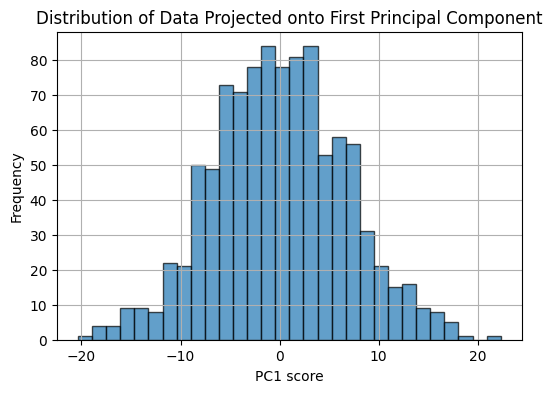

In [ ]:
#79 PCA (3) - 次元削減
# -- 1. 第 1 主成分方向（固有値最大）の単位ベクトル -----------------
v1 = eigvec[:, 0]        # eigvec は前ステップで大きい順に並び替え済み
v1 = v1 / np.linalg.norm(v1)   # 念のため正規化

# -- 2. 2 次元データ cen を v1 方向に射影 → 1 次元スコア -------------
pc1_scores = cen @ v1            # shape = (1000,)

print("First 10 PC1 scores:\n", pc1_scores[:10])

# -- 3. 可視化: ヒストグラム ----------------------------------------
plt.figure(figsize=(6, 4))
plt.hist(pc1_scores, bins=30, edgecolor="black", alpha=0.7)
plt.title("Distribution of Data Projected onto First Principal Component")
plt.xlabel("PC1 score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
